Standardized Precipitation Index (SPI)
---
- used to characterize meteorological drought on a range of timescales. On short timescales, the SPI is closely related to soil moisture, while at longer timescales, the SPI can be related to groundwater and reservoir storage. The SPI can be compared across regions with markedly different climates. It quantifies observed precipitation as a standardized departure from a selected probability distribution function that models the raw precipitation data. The raw precipitation data are typically fitted to a gamma or a Pearson Type III distribution, and then transformed to a normal distribution.

- Concerns have been raised about the utility of the SPI as a measure of changes in drought associated with climate change, as it does not deal with changes in evapotranspiration.


useful link: https://climatedataguide.ucar.edu/climate-data/standardized-precipitation-index-spi

Import Packages
---
Github:  https://github.com/jeffjay88/Climate_Indices

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Load Data
---

In [4]:
data = pd.read_csv('new_data.csv', usecols=[2])
data = data.set_index(
    pd.date_range('1959','1989', freq='M')
)
data.head(5)

,precipitation
1959-01-31,0.57
1959-02-28,0.56
1959-03-31,21.32
1959-04-30,15.15
1959-05-31,19.16


SPI Function (self-defined)
---

In [5]:
#Standardized Precipitation Index Function
def spi(ds, thresh):
    #ds - data ; thresh - time interval / scale
    
    #Rolling Mean / Moving Averages
    ds_ma = ds.rolling(thresh, center=False).mean()
    
    #Natural log of moving averages
    ds_In = np.log(ds_ma)
    ds_In[ np.isinf(ds_In) == True] = np.nan  #Change infinity to NaN
    
    #Overall Mean of Moving Averages
    ds_mu = np.nanmean(ds_ma)
    
    #Summation of Natural log of moving averages
    ds_sum = np.nansum(ds_In)
        
    #Computing essentials for gamma distribution
    n = len(ds_In[thresh-1:])                  #size of data
    A = np.log(ds_mu) - (ds_sum/n)             #Computing A
    alpha = (1/(4*A))*(1+(1+((4*A)/3))**0.5)   #Computing alpha  (a)
    beta = ds_mu/alpha                         #Computing beta (scale)
    
    #Gamma Distribution (CDF)
    gamma = st.gamma.cdf(ds_ma, a=alpha, scale=beta)  
    
    #Standardized Precipitation Index   (Inverse of CDF)
    norm_spi = st.norm.ppf(gamma, loc=0, scale=1)  #loc is mean and scale is standard dev.
    
    return ds_ma, ds_In, ds_mu, ds_sum, n, A, alpha, beta, gamma, norm_spi

In [11]:
import numpy as np
a = [22,22,23,np.nan]

np.nanmean(a)

22.333333333333332

Perform SPI computation on Data at Varying Times
---

In [6]:
times = [3, 6, 9, 12, 24]
for i in times:
    x = spi(data['precipitation'], i)
    data['spi_'+str(i)] = x[9]
    print(data)

            precipitation     spi_3
1959-01-31           0.57       NaN
1959-02-28           0.56       NaN
1959-03-31          21.32  0.688233
1959-04-30          15.15  0.892402
1959-05-31          19.16  1.084394
...                   ...       ...
1988-08-31           1.60  0.869022
1988-09-30           1.00  0.762888
1988-10-31           1.00  0.133952
1988-11-30           1.00  0.089817
1988-12-31           1.00  0.089817

[360 rows x 2 columns]
            precipitation     spi_3     spi_6
1959-01-31           0.57       NaN       NaN
1959-02-28           0.56       NaN       NaN
1959-03-31          21.32  0.688233       NaN
1959-04-30          15.15  0.892402       NaN
1959-05-31          19.16  1.084394       NaN
...                   ...       ...       ...
1988-08-31           1.60  0.869022  1.108980
1988-09-30           1.00  0.762888  0.312972
1988-10-31           1.00  0.133952  0.312972
1988-11-30           1.00  0.089817 -0.032452
1988-12-31           1.00  0.089817 -0

C:\Users\vision\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\vision\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Visualization of SPI
---

<ipython-input-8-cb3c8d907a08>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(range(-3,4), range(-3,4))
<ipython-input-8-cb3c8d907a08>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([],[])
<ipython-input-8-cb3c8d907a08>:11: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks(range(-3,4), range(-3,4))
<ipython-input-8-cb3c8d907a08>:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.

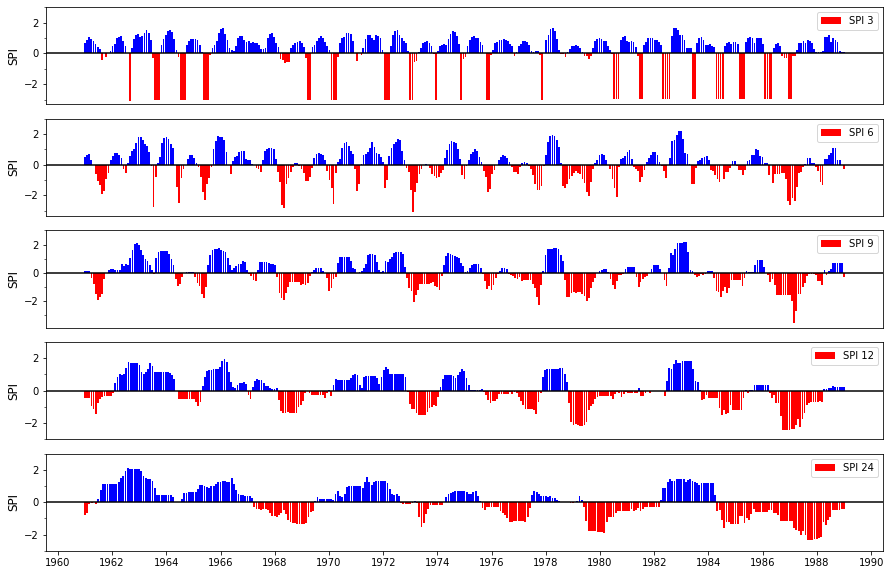

In [8]:
fig, axes = plt.subplots(nrows=5, figsize=(15, 10))
plt.subplots_adjust(hspace=0.15)
for i, ax in enumerate(axes):
    col_scheme=np.where(data['spi_'+str(times[i])]>0, 'b','r')

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    ax.bar(data.index, data['spi_'+str(times[i])], width=25, align='center', color=col_scheme, label='SPI '+str(times[i]))
    ax.axhline(y=0, color='k')
    ax.xaxis.set_major_locator(mdates.YearLocator(2))
    ax.legend(loc='upper right')
    ax.set_yticks(range(-3,4), range(-3,4))
    ax.set_ylabel('SPI', fontsize=12)
    
    if i<len(times)-1:
        ax.set_xticks([],[])
plt.savefig('gg.pdf')

In [9]:
plt.savefig('gg.pdf')

<Figure size 432x288 with 0 Axes>